In [17]:
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

os.chdir("/capstor/scratch/cscs/ajayaraj/qtpyt-tests/gw_edmft/AuBDA14CH2/")

maroon_cmap = LinearSegmentedColormap.from_list(
    "white_to_maroon",
    ["white", "#800000"],
    N=256
)

In [13]:
# TODO: Figure out how to compute number of orbitals for lead programmatically
n_Au_bulk = 810
n_Au_tip = 306

# === Define spherical harmonics for Au ===
n_harmonics_Au = 9  # same for both bulk and tip

# === Input: molecule atoms and harmonics ===
molecule_atoms = {
    'C': (7, 13),
    'N': (2, 13),
    'H': (9, 5),
}


orbitals_molecule = sum(n_atoms * n_harm for n_atoms, n_harm in molecule_atoms.values())

# === Compute nodes ===
Nodes = [
    0,
    n_Au_bulk,
    n_Au_bulk + n_Au_tip,
    n_Au_bulk + n_Au_tip + orbitals_molecule,
    n_Au_bulk + n_Au_tip + orbitals_molecule + n_Au_tip,
    n_Au_bulk + n_Au_tip + orbitals_molecule + n_Au_tip + n_Au_bulk,
]

Nodes = np.array(Nodes, dtype=int)


# np.save("nodes.npy", Nodes)

# # === Show result ===
Nodes


array([   0,  810, 1116, 1278, 1584, 2394])

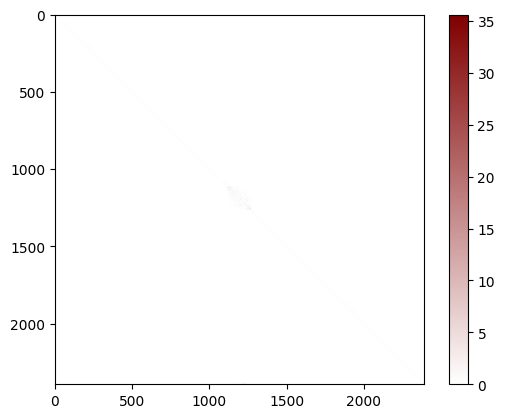

In [19]:
H_los, _ = np.load("./output/lowdin/hs_los.npy")
plt.imshow(np.abs(H_los[0]), cmap=maroon_cmap)
plt.colorbar()

In [11]:
H_eff = np.load("./output/lowdin/eigvals_Heff.npy")
H_eff

array([-6.75878391, -5.6840385 , -3.99062457, -3.31522738, -1.71341389,
        0.07386204,  2.80396026,  3.74716357,  7.39942617])

In [33]:
H_eff = np.load("./output/lowdin/effective_hamiltonian.npy")
H_eff

array([[-4.02426513,  2.41434213, -0.07895805,  0.08429888, -0.03262655,
         0.02071353, -0.02410227, -0.03242206, -0.01505004],
       [ 2.41434213, -0.17059831, -3.00436626,  3.02541949,  0.18775521,
        -0.21409852, -0.02844945, -0.28063062, -0.03476031],
       [-0.07895805, -3.00436626,  0.18409937, -0.2331422 , -3.03570154,
         0.31707259, -0.08836311,  0.25751005, -0.00935094],
       [ 0.08429888,  3.02541949, -0.2331422 ,  0.02512766,  0.31337599,
        -2.93461861,  0.04389496, -0.2102096 ,  0.02003055],
       [-0.03262655,  0.18775521, -3.03570154,  0.31337599,  0.46485463,
        -0.21920115,  2.91401172, -3.16929525, -0.15695578],
       [ 0.02071353, -0.21409852,  0.31707259, -2.93461861, -0.21920115,
        -0.02459284,  0.01573544,  3.01532954,  0.08535508],
       [-0.02410227, -0.02844945, -0.08836311,  0.04389496,  2.91401172,
         0.01573544,  0.19355478, -0.16272598, -0.21856662],
       [-0.03242206, -0.28063062,  0.25751005, -0.2102096 , -3

In [30]:
H_eff = np.load("../AuBDA14/output/lowdin/PBE/kbt_1e-2/effective_hamiltonian.npy")

H_eff

array([[-4.38240142,  2.4171315 ,  0.08232609,  0.08391891,  0.02096391,
         0.02033135,  0.01958074, -0.04685134],
       [ 2.4171315 , -0.85346299,  3.02426083,  3.02650804, -0.20322114,
        -0.20430728,  0.28876984, -0.01949001],
       [ 0.08232609,  3.02426083, -0.66819865,  0.22923938, -2.94336152,
        -0.31357438,  0.20452101,  0.02006868],
       [ 0.08391891,  3.02650804,  0.22923938, -0.66861107, -0.31340122,
        -2.94371869,  0.20332784,  0.02085989],
       [ 0.02096391, -0.20322114, -2.94336152, -0.31340122, -0.66982316,
         0.22888708, -3.02556809,  0.08379049],
       [ 0.02033135, -0.20430728, -0.31357438, -2.94371869,  0.22888708,
        -0.66958574, -3.02327165,  0.08144314],
       [ 0.01958074,  0.28876984,  0.20452101,  0.20332784, -3.02556809,
        -3.02327165, -0.85728475, -2.41901796],
       [-0.04685134, -0.01949001,  0.02006868,  0.02085989,  0.08379049,
         0.08144314, -2.41901796, -4.38406554]])